In [2]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col="DATE")

/var/folders/hf/5zdzbc4x2q73yspszcq92dm40000gn/T/ipykernel_839/1132103949.py:3: DtypeWarning: Columns (4,6,10,20,26,28,30,32,34,36,38,40,42,44,46,48,62,68,70,72,74,76,78,80,82,84,86) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("weather.csv", index_col="DATE")


In [3]:
weather

,STATION,NAME,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,...,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV01,WV01_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,",,X",90.0,",,X",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,",,X",20.0,",,X",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,",,X",100.0,",,X",NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,",,X",20.0,",,X",NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,",,X",10.0,",,X",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,14.99,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,16.78,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,6.26,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [5]:
weather.apply(pd.isnull).sum()

STATION                0
NAME                   0
ACMH                9674
ACMH_ATTRIBUTES     9674
ACSH                9673
                   ...  
WT21_ATTRIBUTES    19284
WT22               19240
WT22_ATTRIBUTES    19240
WV01               19288
WV01_ATTRIBUTES    19288
Length: 86, dtype: int64

In [33]:
null_pct

STATION            0.000000
NAME               0.000000
ACMH               0.501529
ACMH_ATTRIBUTES    0.501529
ACSH               0.501478
                     ...   
WT21_ATTRIBUTES    0.999741
WT22               0.997460
WT22_ATTRIBUTES    0.997460
WV01               0.999948
WV01_ATTRIBUTES    0.999948
Length: 86, dtype: float64

In [37]:
valid_columns = weather.columns[null_pct < .05]

In [38]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES',
       'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES'],
      dtype='object')

In [39]:
weather = weather[valid_columns].copy()

In [40]:
weather.columns = weather.columns.str.lower()

In [41]:
weather

,station,name,prcp,prcp_attributes,snow,snow_attributes,snwd,snwd_attributes,tmax,tmax_attributes,tmin,tmin_attributes
DATE,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,",,0,",0.0,",,0,",0.0,",,0,",28,",,0",22,",,0"
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,",,0,",0.0,",,0,",0.0,",,0,",31,",,0",22,",,0"
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,",,0,",0.0,"T,,0,",0.0,",,0,",38,",,0",25,",,0"
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,"T,,0,",0.0,"T,,0,",0.0,",,0,",31,",,0",23,",,0"
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,",,0,",0.0,",,0,",0.0,",,0,",35,",,0",21,",,0"
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,",,W,2400",0.0,",,W,2400",0.0,",,W,2400",56,",,W",43,",,W"
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,",,W,2400",0.0,",,W,2400",0.0,",,W,2400",61,",,W",44,",,W"
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,",,W,2400",0.0,",,W,2400",0.0,",,W,2400",64,",,W",43,",,W"


In [42]:
weather = weather.ffill()

In [43]:
weather.apply(pd.isnull).sum()

station            0
name               0
prcp               0
prcp_attributes    0
snow               0
snow_attributes    0
snwd               0
snwd_attributes    0
tmax               0
tmax_attributes    0
tmin               0
tmin_attributes    0
dtype: int64

In [44]:
weather.dtypes

station             object
name                object
prcp               float64
prcp_attributes     object
snow               float64
snow_attributes     object
snwd               float64
snwd_attributes     object
tmax                 int64
tmax_attributes     object
tmin                 int64
tmin_attributes     object
dtype: object

In [45]:
weather.drop('prcp_attributes', inplace=True, axis=1)

In [46]:
weather.dtypes

station             object
name                object
prcp               float64
snow               float64
snow_attributes     object
snwd               float64
snwd_attributes     object
tmax                 int64
tmax_attributes     object
tmin                 int64
tmin_attributes     object
dtype: object

In [48]:
weather.drop('snow_attributes',inplace=True, axis=1)

In [49]:
weather.drop('snwd_attributes',inplace=True, axis=1)

In [50]:
weather.drop('tmax_attributes',inplace=True, axis=1)

In [51]:
weather.drop('tmin_attributes',inplace=True, axis=1)

In [52]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [53]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
       '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23'],
      dtype='object', name='DATE', length=19289)

In [54]:
weather.index = pd.to_datetime(weather.index)

In [55]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17',
               '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-22', '2022-10-23'],
              dtype='datetime64[ns]', name='DATE', length=19289, freq=None)

In [56]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    296
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

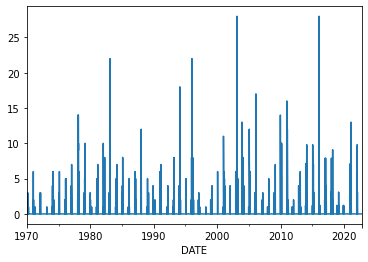

In [57]:
weather["snwd"].plot()

In [58]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43


For predicting tomorrow's temperature, using Tmax and Tmin

In [59]:
weather["target"] = weather.shift(-1)["tmax"]

In [60]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0


In [61]:
weather = weather.ffill()

In [62]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0


In [64]:
from sklearn.linear_model import Ridge

In [65]:
weather.corr()

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.151053,0.001183,-0.007213,0.052278,-0.003357
snow,0.151053,1.000000,0.232568,-0.175076,-0.159285,-0.172736
snwd,0.001183,0.232568,1.000000,-0.259858,-0.256976,-0.241054
tmax,-0.007213,-0.175076,-0.259858,1.000000,0.955476,0.915294
tmin,0.052278,-0.159285,-0.256976,0.955476,1.000000,0.915453
target,-0.003357,-0.172736,-0.241054,0.915294,0.915453,1.000000


Applying Ridge Regression Model

In [66]:
rr = Ridge(alpha = .1)

In [67]:
predictors = weather.columns[~weather.columns.isin(["target", "name","station"])]

In [68]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

Back Testing/Time series cross validation to account for the times series nature of data

In [70]:
def backtest(weather,model,predictors,start=3650,step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0],step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [72]:
predictions = backtest(weather, rr, predictors)

In [73]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-19,61.0,57.030435,3.969565
2022-10-20,64.0,59.784804,4.215196
2022-10-21,65.0,60.609742,4.390258


Generating Accuracy Metric using Mean Absolute Error

In [74]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.139020812384854

In [75]:
predictions["diff"].mean()

5.139020812384827

Imporving the predictions

In [76]:
def pct_diff(old,new):
    return (new-old)/old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizon = [3,4]

for horizon in rolling_horizon:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather,horizon,col)

In [77]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_4_tmax,rolling_4_tmax_pct,rolling_4_tmin,rolling_4_tmin_pct,rolling_4_prcp,rolling_4_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,6.666667e-03,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,6.666667e-03,-1.0,32.00,-0.031250,23.00,0.000000,5.000000e-03,-1.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,6.666667e-03,-1.0,33.75,0.037037,22.75,-0.076923,5.000000e-03,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,2.666667e-02,-1.0,61.75,-0.093117,49.25,-0.126904,2.000000e-02,-1.0
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0,58.333333,0.045714,45.000000,-0.022222,3.700743e-16,-1.0,60.50,0.008264,47.25,-0.068783,2.000000e-02,-1.0
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0,60.333333,0.060773,43.333333,-0.007692,3.700743e-16,-1.0,59.75,0.071130,44.50,-0.033708,4.440892e-16,-1.0


In [78]:
weather = weather.iloc[14:,:]

In [79]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_4_tmax,rolling_4_tmax_pct,rolling_4_tmin,rolling_4_tmin_pct,rolling_4_prcp,rolling_4_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000e+00,NaN,30.00,-0.033333,19.50,-0.333333,3.250000e-02,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000e+00,NaN,31.25,0.152000,18.75,0.120000,0.000000e+00,NaN
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,6.666667e-03,2.0,33.50,0.283582,20.00,0.500000,5.000000e-03,3.000000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,4.000000e-02,1.5,37.50,0.120000,22.25,0.123596,3.000000e-02,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,4.000000e-02,-1.0,36.50,-0.315068,23.00,-0.304348,3.000000e-02,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,2.666667e-02,-1.0,61.75,-0.093117,49.25,-0.126904,2.000000e-02,-1.000000
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0,58.333333,0.045714,45.000000,-0.022222,3.700743e-16,-1.0,60.50,0.008264,47.25,-0.068783,2.000000e-02,-1.000000
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0,60.333333,0.060773,43.333333,-0.007692,3.700743e-16,-1.0,59.75,0.071130,44.50,-0.033708,4.440892e-16,-1.000000


In [80]:
weather = weather.fillna(0)

In [81]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_4_tmax,rolling_4_tmax_pct,rolling_4_tmin,rolling_4_tmin_pct,rolling_4_prcp,rolling_4_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000e+00,0.0,30.00,-0.033333,19.50,-0.333333,3.250000e-02,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000e+00,0.0,31.25,0.152000,18.75,0.120000,0.000000e+00,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,6.666667e-03,2.0,33.50,0.283582,20.00,0.500000,5.000000e-03,3.000000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,4.000000e-02,1.5,37.50,0.120000,22.25,0.123596,3.000000e-02,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,4.000000e-02,-1.0,36.50,-0.315068,23.00,-0.304348,3.000000e-02,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,2.666667e-02,-1.0,61.75,-0.093117,49.25,-0.126904,2.000000e-02,-1.000000
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0,58.333333,0.045714,45.000000,-0.022222,3.700743e-16,-1.0,60.50,0.008264,47.25,-0.068783,2.000000e-02,-1.000000
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0,60.333333,0.060773,43.333333,-0.007692,3.700743e-16,-1.0,59.75,0.071130,44.50,-0.033708,4.440892e-16,-1.000000


In [83]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [84]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_4_tmin,rolling_4_tmin_pct,rolling_4_prcp,rolling_4_prcp_pct,month_avgtmax,day_avgtmax,month_avgtmin,day_avgtmin,month_avgprcp,day_avgprcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,19.50,-0.333333,3.250000e-02,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.75,0.120000,0.000000e+00,0.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,20.00,0.500000,5.000000e-03,3.000000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,22.25,0.123596,3.000000e-02,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,23.00,-0.304348,3.000000e-02,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,...,49.25,-0.126904,2.000000e-02,-1.000000,64.833844,62.056604,50.220110,48.132075,0.115175,0.117547
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0,58.333333,0.045714,...,47.25,-0.068783,2.000000e-02,-1.000000,64.831495,62.660377,50.216299,48.471698,0.115104,0.193962
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0,60.333333,0.060773,...,44.50,-0.033708,4.440892e-16,-1.000000,64.830986,63.471698,50.211880,47.867925,0.115034,0.079057


In [85]:
predictors = weather.columns[~weather.columns.isin(["target", "name","station"])]

In [86]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_4_tmax',
       'rolling_4_tmax_pct', 'rolling_4_tmin', 'rolling_4_tmin_pct',
       'rolling_4_prcp', 'rolling_4_prcp_pct', 'month_avgtmax', 'day_avgtmax',
       'month_avgtmin', 'day_avgtmin', 'month_avgprcp', 'day_avgprcp'],
      dtype='object')

In [87]:
predictions = backtest(weather, rr, predictors)

In [88]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.783757146070434

In [89]:
predictions.sort_values("diff", ascending = False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.361320,30.638680
2007-03-26,78.0,50.672896,27.327104
1998-03-26,80.0,53.119101,26.880899
1997-02-26,71.0,44.824377,26.175623
1985-04-18,84.0,58.726414,25.273586
...,...,...,...
2016-09-01,80.0,79.998075,0.001925
1999-01-06,36.0,35.998522,0.001478
1981-11-04,62.0,61.998589,0.001411


In [90]:
weather.loc["1990-03-07" : "1990-03-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_4_tmin,rolling_4_tmin_pct,rolling_4_prcp,rolling_4_prcp_pct,month_avgtmax,day_avgtmax,month_avgtmin,day_avgtmin,month_avgprcp,day_avgprcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,...,20.50,-0.317073,5.250000e-02,-1.000000,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,...,19.25,0.038961,5.250000e-02,-1.000000,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,...,21.25,0.364706,5.500000e-02,-0.818182,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,...,25.50,0.529412,5.000000e-03,1.000000,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,...,32.25,0.271318,1.750000e-02,1.857143,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,38.00,0.131579,1.750000e-02,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,41.00,0.000000,1.500000e-02,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,42.75,0.076023,1.250000e-02,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,43.25,-0.005780,2.220446e-16,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


<AxesSubplot:>

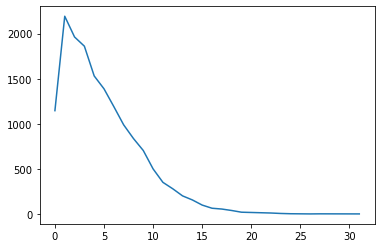

In [94]:
predictions["diff"].round().value_counts().sort_index().plot()